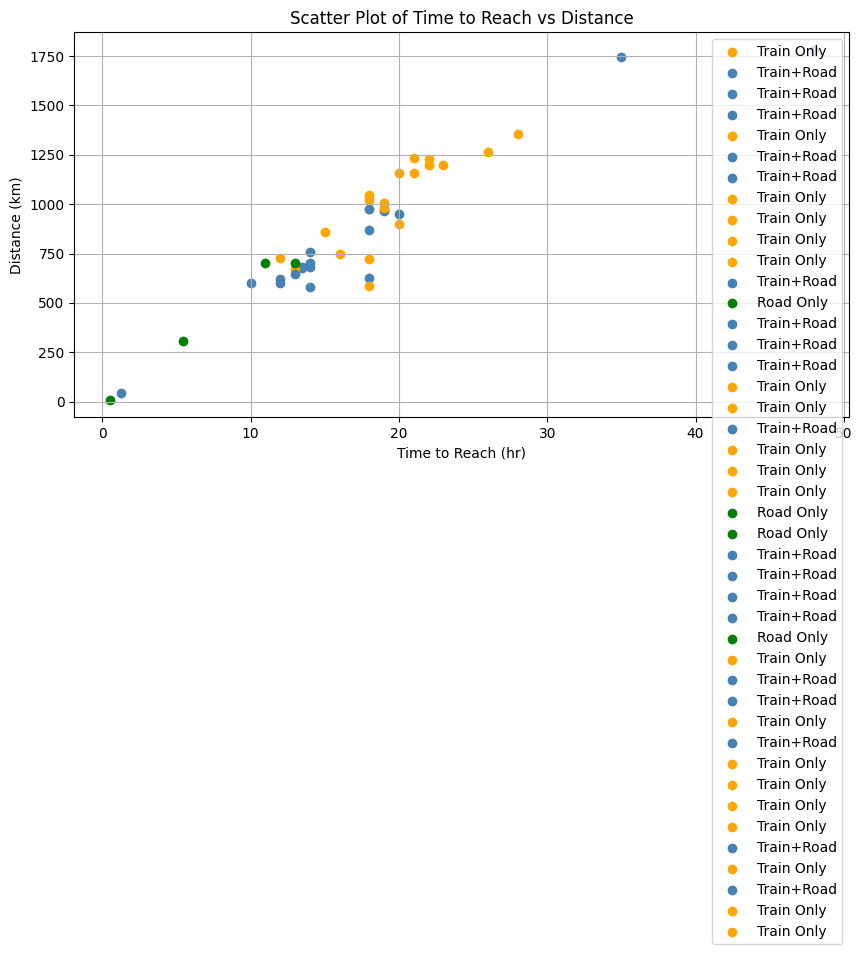

[135.62292013  42.23139102]
[ 895.7879585   895.7879585   705.74669891  705.74669891  895.7879585
  726.86239442  895.7879585  1022.48213156 1233.63908667  769.09378544
  684.6310034   188.41215891  156.73861564  726.86239442 1613.72160585
  938.01934952  895.7879585   642.39961238  726.86239442 1064.71352259
  811.32517646 1022.48213156  684.6310034   366.62862901  557.93683034
  980.25074054  642.39961238 2162.72968912  600.16822136  895.7879585
  642.39961238  938.01934952  938.01934952  895.7879585  1318.10186871
 1106.94491361  938.01934952  980.25074054  684.6310034   895.7879585
  726.86239442  980.25074054 1064.71352259]
0     124.212041
1     -25.787959
2     -29.746699
3     -25.746699
4      81.212041
5    -146.862394
6      81.212041
7     134.517868
8      30.360913
9      91.906215
10    -15.631003
11   -144.412159
12   -147.738616
13     29.137606
14    129.278394
15     31.980650
16    148.212041
17     84.600388
18    -43.862394
19    135.286477
20    -61.325176
21    

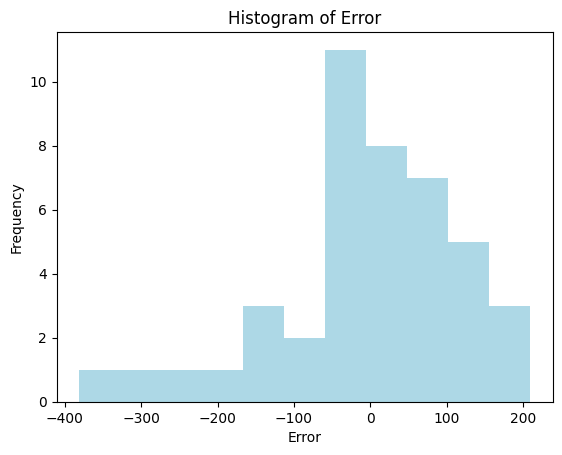

[-11.06834871  58.80124774]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/DIstanceTimeDataset - Sheet1(2).csv')

plt.figure(figsize=(10, 5))

for index, row in df.iterrows():
    if row['Train Only'] == 1:
        color = 'orange'
        label = 'Train Only'
    elif row['Road Only'] == 1:
        color = 'green'
        label = 'Road Only'
    elif row['Train+Road'] == 1:
        color = 'steelblue'
        label = 'Train+Road'
    else:
        color = 'gray'
        label = 'Unknown'
    plt.scatter(row['Time to Reach (hr)'], row['Distance (km)'], color=color, label=label)


plt.xlabel('Time to Reach (hr)')
plt.ylabel('Distance (km)')
plt.title('Scatter Plot of Time to Reach vs Distance')
plt.grid(True)
plt.legend()
plt.show()

A = np.column_stack((np.ones_like(df['Time to Reach (hr)']), df['Time to Reach (hr)']))
B = df['Distance (km)']
Y = np.transpose(B)
At = np.transpose(A)
AtA = np.dot(At, A)
AtA_inv = np.linalg.inv(AtA)
AtY = np.dot(At, Y)
w = np.dot(AtA_inv, AtY)
print(w)

y_pred = np.dot(A, w)
print(y_pred)
error = B - y_pred
print(error)

error_ver = np.dot(error,A[:,0])
print(error_ver)
plt.hist(error, bins=11, color='lightblue',)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Error')
plt.show()

road_only_df = df[df['Road Only'] == 1]
a_road = np.array(road_only_df['Time to Reach (hr)'])
b_road = np.array(road_only_df['Distance (km)'])

A_road = np.column_stack((np.ones_like(a_road), a_road))
B_road = b_road
Y_road = np.transpose(B_road)
At_road = np.transpose(A_road)
AtA_road = np.dot(At_road, A_road)
AtA_inv_road = np.linalg.inv(AtA_road)
AtY_road = np.dot(At_road, Y_road)
w_road = np.dot(AtA_inv_road, AtY_road)
print(w_road)
